In [1]:
import pandas as pd

# Define the path to your CSV file
file_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/filtered_bts.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(file_path)

# Quick check of the data
print(df.head())       # show first 5 rows
print(df.info())       # summary of columns and types


   Unnamed: 0  CRUISE6  CRUISE  STRATUM  TOW  STATION  STATUS_CODE  \
0      274978   202402  202402     1010    1      266           10   
1      274979   202402  202402     1010    1      266           10   
2      274980   202402  202402     1010    1      266           10   
3      274981   202402  202402     1010    1      266           10   
4      274982   202402  202402     1010    1      266           10   

                   ID  STATYPE  HAUL  ...  BOTSPEED  WATCH_CHIEF_COMMENTS  \
0  202402010100010266      1.0   1.0  ...       3.0                   NaN   
1  202402010100010266      1.0   1.0  ...       3.0                   NaN   
2  202402010100010266      1.0   1.0  ...       3.0                   NaN   
3  202402010100010266      1.0   1.0  ...       3.0                   NaN   
4  202402010100010266      1.0   1.0  ...       3.0                   NaN   

   STATION_COMMENTS HABITAT_COMMENTS  SVSPP CATCHSEX  EXPCATCHNUM EXPCATCHWT  \
0               NaN              NaN

In [2]:
import pandas as pd

file_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/22561_UNION_FSCS_SVSTA.csv"

# Try with a more permissive encoding
df_svsta = pd.read_csv(file_path, encoding="latin1")   # or encoding="cp1252"

# Quick inspection
print(df_svsta.head())
print(df_svsta.info())


   CRUISE6  CRUISE  STRATUM  TOW  STATION  STATUS_CODE                  ID  \
0   196803    6803     1050    3        1           10  196803010500030001   
1   196803    6803     1050    4        2           10  196803010500040002   
2   196803    6803     1090    1        3           10  196803010900010003   
3   196803    6803     1060    6        4           10  196803010600060004   
4   196803    6803     1060    5        5           10  196803010600050005   

   STATYPE  HAUL  GEARCOND  ...  SURFTEMP  SURFSALIN BOTTEMP  BOTSALIN FULD  \
0      1.0   1.0       1.0  ...       2.3        NaN     2.9       NaN  0.0   
1      1.0   1.0       1.0  ...       2.4        NaN     2.3       NaN  0.0   
2      1.0   2.0       3.0  ...       2.0        NaN     2.4       NaN  0.0   
3      1.0   1.0       1.0  ...       2.8        NaN     NaN       NaN  0.0   
4      1.0   1.0       1.0  ...       3.0        NaN     6.3       NaN  0.0   

   NO_DETAIL_SVSPP BOTSPEED  WATCH_CHIEF_COMMENTS STATIO

/tmp/ipykernel_3648/2491899114.py:6: DtypeWarning: Columns (66,67,68,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_svsta = pd.read_csv(file_path, encoding="latin1")   # or encoding="cp1252"


In [3]:
import pandas as pd

# Load both datasets
bts_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/filtered_bts.csv"
svsta_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/22561_UNION_FSCS_SVSTA.csv"

df_bts = pd.read_csv(bts_path)
df_svsta = pd.read_csv(svsta_path, encoding="latin1")  # use latin1 to avoid Unicode errors

# Merge on common keys
merged = pd.merge(
    df_bts,
    df_svsta,
    on=["CRUISE", "STRATUM", "TOW", "STATION"],
    how="inner"   # only keep matching rows
)

# Quick inspection
print(merged.head())
print(f"Merged dataset shape: {merged.shape}")


   Unnamed: 0  CRUISE6_x  CRUISE  STRATUM  TOW  STATION  STATUS_CODE_x  \
0      274978     202402  202402     1010    1      266             10   
1      274979     202402  202402     1010    1      266             10   
2      274980     202402  202402     1010    1      266             10   
3      274981     202402  202402     1010    1      266             10   
4      274982     202402  202402     1010    1      266             10   

                 ID_x  STATYPE_x  HAUL_x  ...  SURFTEMP_y  SURFSALIN_y  \
0  202402010100010266        1.0     1.0  ...        7.03       31.993   
1  202402010100010266        1.0     1.0  ...        7.03       31.993   
2  202402010100010266        1.0     1.0  ...        7.03       31.993   
3  202402010100010266        1.0     1.0  ...        7.03       31.993   
4  202402010100010266        1.0     1.0  ...        7.03       31.993   

   BOTTEMP_y BOTSALIN_y  FULD_y NO_DETAIL_SVSPP_y  BOTSPEED_y  \
0       7.05     32.015     NaN              

/tmp/ipykernel_3648/2743835140.py:8: DtypeWarning: Columns (66,67,68,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_svsta = pd.read_csv(svsta_path, encoding="latin1")  # use latin1 to avoid Unicode errors


In [3]:
import pandas as pd

# Paths to your existing files
bts_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/filtered_bts.csv"
svsta_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/22561_UNION_FSCS_SVSTA.csv"

# Load datasets
df_bts = pd.read_csv(bts_path)
df_svsta = pd.read_csv(svsta_path, encoding="latin1")  # latin1 avoids UnicodeDecodeError

# Merge on common keys
merged = pd.merge(
    df_bts,
    df_svsta,
    on=["CRUISE", "STRATUM", "TOW", "STATION"],
    how="inner"   # keep only matching rows
)

# Save merged dataset to disk
out_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/merged_bts_svsta.csv"
merged.to_csv(out_path, index=False)

print(f"Merged dataset saved to {out_path}")
print(merged.head())


/tmp/ipykernel_4405/2546070864.py:9: DtypeWarning: Columns (66,67,68,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_svsta = pd.read_csv(svsta_path, encoding="latin1")  # latin1 avoids UnicodeDecodeError


Merged dataset saved to /home/jovyan/My_Project/2026-proj-Trawling4PACE/data/merged_bts_svsta.csv
   Unnamed: 0  CRUISE6_x  CRUISE  STRATUM  TOW  STATION  STATUS_CODE_x  \
0      274978     202402  202402     1010    1      266             10   
1      274979     202402  202402     1010    1      266             10   
2      274980     202402  202402     1010    1      266             10   
3      274981     202402  202402     1010    1      266             10   
4      274982     202402  202402     1010    1      266             10   

                 ID_x  STATYPE_x  HAUL_x  ...  SURFTEMP_y  SURFSALIN_y  \
0  202402010100010266        1.0     1.0  ...        7.03       31.993   
1  202402010100010266        1.0     1.0  ...        7.03       31.993   
2  202402010100010266        1.0     1.0  ...        7.03       31.993   
3  202402010100010266        1.0     1.0  ...        7.03       31.993   
4  202402010100010266        1.0     1.0  ...        7.03       31.993   

   BOTTEMP_y

In [4]:
import pandas as pd

# Paths to your existing files
bts_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/filtered_bts.csv"
svsta_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/22561_UNION_FSCS_SVSTA.csv"

# Load datasets
df_bts = pd.read_csv(bts_path)
df_svsta = pd.read_csv(svsta_path, encoding="latin1")  # latin1 avoids UnicodeDecodeError

# Merge on common keys
merged = pd.merge(
    df_bts,
    df_svsta,
    on=["CRUISE", "STRATUM", "TOW", "STATION"],
    how="inner"   # keep only matching rows
)

# Save merged dataset to disk
out_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/merged_bts_svsta.csv"
merged.to_csv(out_path, index=False)

# Quick check
print(f"Merged dataset saved to {out_path}")
print("Original BTS rows:", len(df_bts))
print("Original FSCS rows:", len(df_svsta))
print("Merged rows:", len(merged))
print(merged.head())


/tmp/ipykernel_4405/2649210807.py:9: DtypeWarning: Columns (66,67,68,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_svsta = pd.read_csv(svsta_path, encoding="latin1")  # latin1 avoids UnicodeDecodeError


Merged dataset saved to /home/jovyan/My_Project/2026-proj-Trawling4PACE/data/merged_bts_svsta.csv
Original BTS rows: 14507
Original FSCS rows: 20385
Merged rows: 14122
   Unnamed: 0  CRUISE6_x  CRUISE  STRATUM  TOW  STATION  STATUS_CODE_x  \
0      274978     202402  202402     1010    1      266             10   
1      274979     202402  202402     1010    1      266             10   
2      274980     202402  202402     1010    1      266             10   
3      274981     202402  202402     1010    1      266             10   
4      274982     202402  202402     1010    1      266             10   

                 ID_x  STATYPE_x  HAUL_x  ...  SURFTEMP_y  SURFSALIN_y  \
0  202402010100010266        1.0     1.0  ...        7.03       31.993   
1  202402010100010266        1.0     1.0  ...        7.03       31.993   
2  202402010100010266        1.0     1.0  ...        7.03       31.993   
3  202402010100010266        1.0     1.0  ...        7.03       31.993   
4  20240201010001

In [6]:
import pandas as pd

data_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/merged_bts_svsta.csv"
df = pd.read_csv(data_path, low_memory=False)  # suppress dtype warning

print(df.columns.tolist())


['Unnamed: 0', 'CRUISE6_x', 'CRUISE', 'STRATUM', 'TOW', 'STATION', 'STATUS_CODE_x', 'ID_x', 'STATYPE_x', 'HAUL_x', 'GEARCOND_x', 'SHG_x', 'TYPE_CODE_x', 'TYPE_COMMENT_x', 'OPERATION_CODE_x', 'OPERATION_COMMENT_x', 'GEAR_CODE_x', 'GEAR_COMMENT_x', 'ACQUISITION_CODE_x', 'ACQUISITION_COMMENT_x', 'TOGA_x', 'AREA_x', 'SVVESSEL_x', 'CRUNUM_x', 'SVGEAR_x', 'BEGIN_EST_TOWDATE_x', 'BEING_EST_TOWDATE_x', 'BEGIN_GMT_TOWDATE_x', 'BEGIN_GMT_TOWDATE_1_x', 'EST_YEAR_x', 'EST_MONTH_x', 'EST_DAY_x', 'EST_JULIAN_DAY_x', 'EST_TIME_x', 'GMT_YEAR_x', 'GMT_MONTH_x', 'GMT_DAY_x', 'GMT_JULIAN_DAY_x', 'GMT_TIME_x', 'TOWDUR_x', 'SETDEPTH_x', 'ENDDEPTH_x', 'MINDEPTH_x', 'MAXDEPTH_x', 'AVGDEPTH_x', 'BEGEKVLOG_x', 'ENDEKVLOG_x', 'BEGLAT_x', 'BEGLON_x', 'ENDLAT_x', 'ENDLON_x', 'DECDEG_BEGLAT_x', 'DECDEG_BEGLON_x', 'DECDEG_ENDLAT_x', 'DECDEG_ENDLON_x', 'LORS1_x', 'LORE1_x', 'LORS2_x', 'LORE2_x', 'CABLE_x', 'PITCH_x', 'HEADING_x', 'COURSE_x', 'RPM_x', 'DOPDISTB_x', 'DOPDISTW_x', 'DESSPEED_x', 'GEARID_x', 'DOORID_x', 

In [7]:
predictors = [
    "SURFTEMP_x", "BOTTEMP_x", "SURFSALIN_x", "BOTSALIN_x",
    "AVGDEPTH_x", "WAVEHGT_x", "WINDSP_x", "AIRTEMP_x"
]


In [9]:
# Define target species
species = "Gadus morhua"

# Create binary presence/absence column
df["species_presence"] = ((df["SCIENTIFIC_NAME"] == species) & (df["EXPCATCHNUM"] > 0)).astype(int)

print(df["species_presence"].value_counts())


species_presence
0    14122
Name: count, dtype: int64


In [10]:
predictors = [
    "SURFTEMP_x", "BOTTEMP_x", "SURFSALIN_x", "BOTSALIN_x",
    "AVGDEPTH_x", "WAVEHGT_x", "WINDSP_x", "AIRTEMP_x"
]
X = df[predictors].fillna(df[predictors].median())
y = df["species_presence"]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_rf))

plt.barh(predictors, rf.feature_importances_)
plt.title("Random Forest Variable Importance")
plt.show()

# --- XGBoost ---
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_xgb))

xgb.plot_importance(xgb_model, importance_type="gain")
plt.title("XGBoost Feature Importance")
plt.show()


Random Forest Accuracy: 1.0


IndexError: index 1 is out of bounds for axis 1 with size 1

In [13]:
species_counts = df.groupby("SCIENTIFIC_NAME")["EXPCATCHNUM"].sum().sort_values(ascending=False)
print(species_counts.head(20))


SCIENTIFIC_NAME
Peprilus triacanthus (butterfish)                     336787.0
Merluccius bilinearis (silver hake)                   219707.0
Loligo pealeii (longfin squid)                        213636.0
Prionotus carolinus (northern searobin)               118208.0
Leiostomus xanthurus (spot)                            94833.0
Micropogonias undulatus (Atlantic croaker)             57940.0
Squalus acanthias (spiny dogfish)                      55794.0
Placopecten magellanicus (sea scallop)                 55062.0
Scomber scombrus (Atlantic mackerel)                   42505.0
Alosa aestivalis (blueback herring)                    39019.0
Urophycis chuss (red hake)                             32587.0
Anchoa mitchilli (bay anchovy)                         29046.0
Clupea harengus (Atlantic herring)                     21046.0
Centropristis striata (black sea bass)                 20490.0
Alosa pseudoharengus (alewife)                         18488.0
Leucoraja erinacea (little skate)      

In [14]:
# Define target species
species = "Peprilus triacanthus (butterfish)"

# Create binary presence/absence column
df["species_presence"] = ((df["SCIENTIFIC_NAME"] == species) & (df["EXPCATCHNUM"] > 0)).astype(int)

print(df["species_presence"].value_counts())


species_presence
0    13867
1      255
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Predictors
predictors = [
    "SURFTEMP_x", "BOTTEMP_x", "SURFSALIN_x", "BOTSALIN_x",
    "AVGDEPTH_x", "WAVEHGT_x", "WINDSP_x", "AIRTEMP_x"
]
X = df[predictors].fillna(df[predictors].median())
y = df["species_presence"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Random Forest with class weights ---
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",   # handles imbalance
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_rf))

# --- XGBoost with scale_pos_weight ---
# ratio = (number of negatives / number of positives)
ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,   # handles imbalance
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_xgb))


Random Forest ROC-AUC: 0.3952672327672327
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      4160
           1       0.00      0.00      0.00        77

    accuracy                           0.78      4237
   macro avg       0.49      0.40      0.44      4237
weighted avg       0.96      0.78      0.86      4237

XGBoost ROC-AUC: 0.4794627247752248
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      4160
           1       0.00      0.05      0.01        77

    accuracy                           0.74      4237
   macro avg       0.49      0.40      0.43      4237
weighted avg       0.96      0.74      0.83      4237



In [24]:
# Drop predictors with all NaN values
X_train = X_train.dropna(axis=1, how="all")
X_test = X_test.dropna(axis=1, how="all")

# Impute remaining predictors
imputer = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imp  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [25]:
imputer = SimpleImputer(strategy="constant", fill_value=0)
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imp  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


species_presence
0    13867
1      255
Name: count, dtype: int64
Resampled class distribution: [9707 9707]
Random Forest ROC-AUC: 0.39221247502497497
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4160
           1       0.00      0.00      0.00        77

    accuracy                           0.98      4237
   macro avg       0.49      0.50      0.50      4237
weighted avg       0.96      0.98      0.97      4237



/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

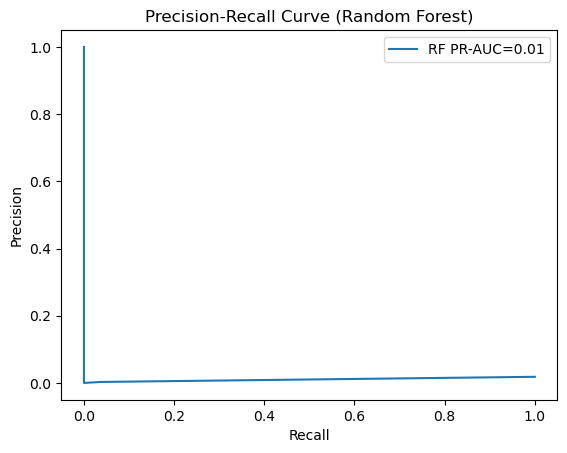

XGBoost ROC-AUC: 0.5836772602397602
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4160
           1       0.01      0.08      0.02        77

    accuracy                           0.89      4237
   macro avg       0.50      0.49      0.48      4237
weighted avg       0.96      0.89      0.92      4237



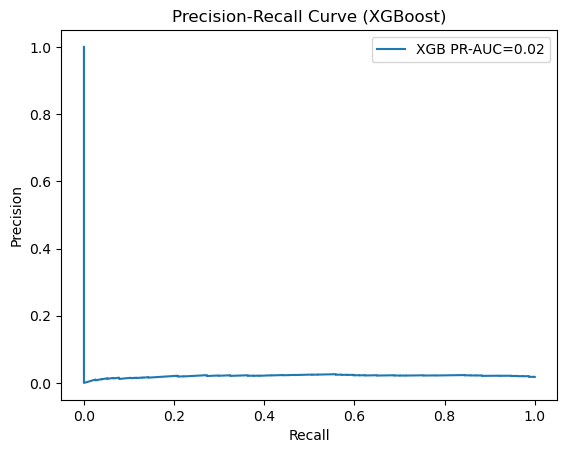

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. Load dataset
# -----------------------------
data_path = "/home/jovyan/My_Project/2026-proj-Trawling4PACE/data/merged_bts_svsta.csv"
df = pd.read_csv(data_path, low_memory=False)

# -----------------------------
# 2. Define target species
# -----------------------------
species = "Peprilus triacanthus (butterfish)"
df["species_presence"] = ((df["SCIENTIFIC_NAME"] == species) & (df["EXPCATCHNUM"] > 0)).astype(int)
print(df["species_presence"].value_counts())

# -----------------------------
# 3. Select predictors
# -----------------------------
predictors = [
    "SURFTEMP_x", "BOTTEMP_x", "SURFSALIN_x", "BOTSALIN_x",
    "AVGDEPTH_x", "WAVEHGT_x", "WINDSP_x", "AIRTEMP_x"
]

X = df[predictors]

# Drop columns that are entirely NaN
X = X.dropna(axis=1, how="all")

y = df["species_presence"]

# -----------------------------
# 4. Stratified split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# 5. Impute missing values
# -----------------------------
imputer = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imp  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# -----------------------------
# 6. Balance training data with SMOTE
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imp, y_train)
print("Resampled class distribution:", np.bincount(y_train_res))

# -----------------------------
# 7. Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test_imp)

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_imp)[:,1]))
print(classification_report(y_test, y_pred_rf))

precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test_imp)[:,1])
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"RF PR-AUC={pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend()
plt.show()

# -----------------------------
# 8. XGBoost
# -----------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test_imp)

print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_imp)[:,1]))
print(classification_report(y_test, y_pred_xgb))

precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test_imp)[:,1])
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"XGB PR-AUC={pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, ConvLSTM2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Example: predictors with spatial + temporal info
predictors = ["SURFTEMP_x", "BOTTEMP_x", "SURFSALIN_x", "BOTSALIN_x",
              "AVGDEPTH_x", "WAVEHGT_x", "WINDSP_x", "EST_MONTH_x"]

X = df[predictors].fillna(df[predictors].median())
y = df["species_presence"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN-LSTM (samples, timesteps, features)
# Example: treat each tow as 1 timestep with features
X_seq = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.3, stratify=y, random_state=42)
